<a href="https://colab.research.google.com/github/Andreagazy/PCVK-2024/blob/main/Modul_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import glob
import math

Mounted at /content/drive


 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


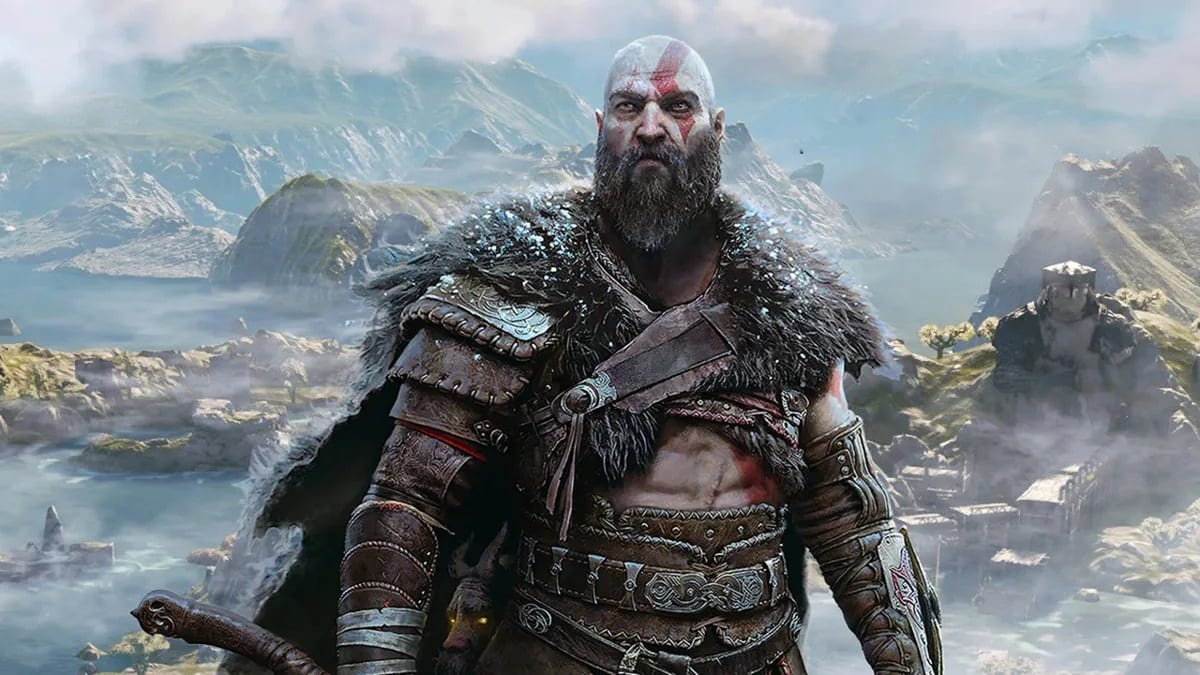

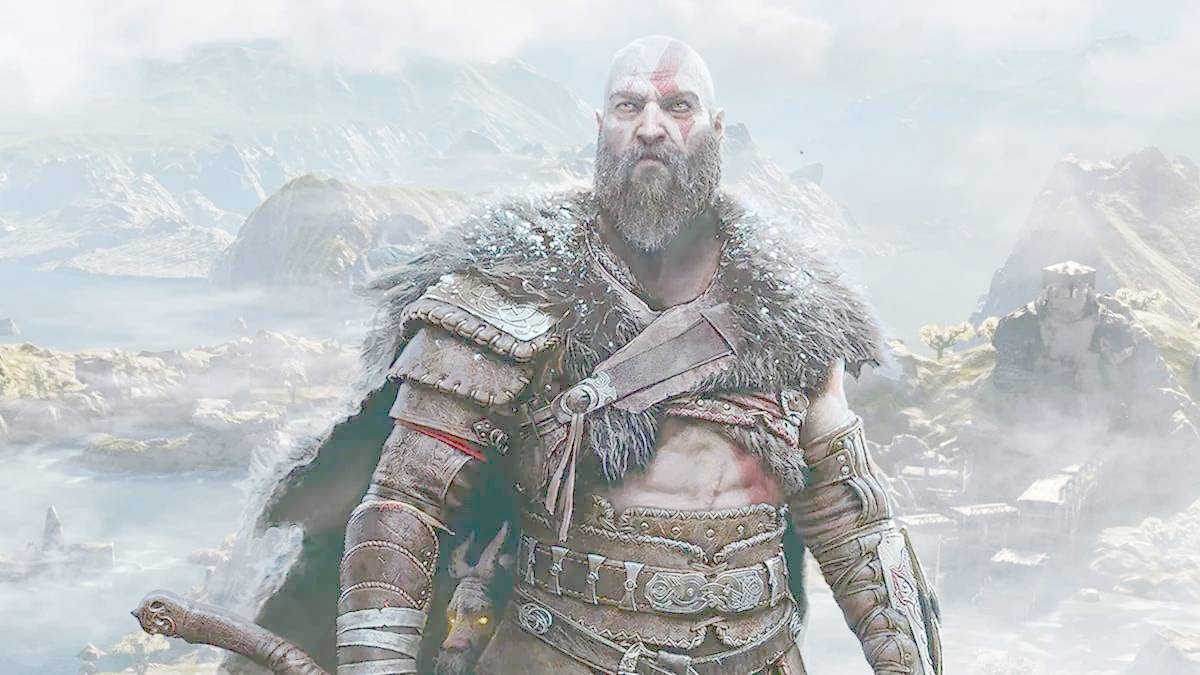

In [4]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Real_Kratos.jpg')
if original is None:
    print("Gambar tidak ditemukan!")
    exit()

def gamma_correction(image, gamma):
    # Membuat lookup table untuk setiap nilai pixel
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")

    # Mengaplikasikan lookup table ke gambar
    return cv.LUT(image, table)

corrected_image = gamma_correction(original, gamma)

cv2_imshow(original)
cv2_imshow(corrected_image)